/home/yjj/miniconda3/envs/jailbreak/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/yjj/models/bert-base-uncased/ were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identica

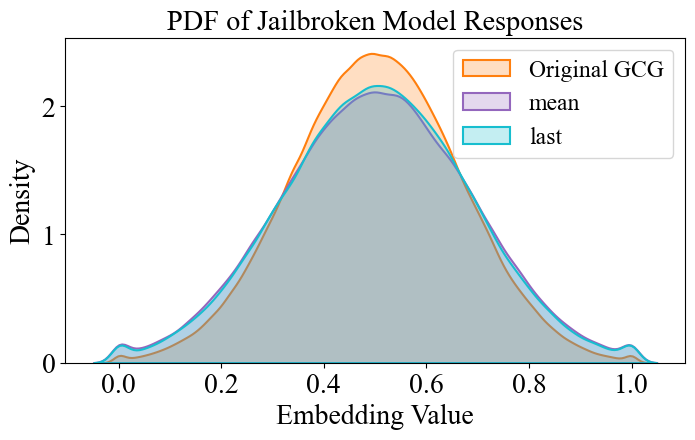

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import MinMaxScaler
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 17  # 替换成你想要的字体大小

tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(3)
with open('vicuna_without_cosdecay_and_mean_sentemb15.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:3')
    outputs = model(**encoded_input)
    embedding.append( outputs.last_hidden_state[0, 0, :].cpu())
vicuna_without_cosdecay_and_mean_sentemb15=torch.stack(embedding,axis=0)


tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(2)
with open('vicuna_0_corpus.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:2')
    outputs = model(**encoded_input)
    last_hidden_state = outputs.last_hidden_state[0, 0, :]
    embedding.append(last_hidden_state.cpu())
vicuna_0_corpus=torch.stack(embedding,axis=0)

tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(1)
with open('vicuna_without_cosdecay_and_lasthiddenstate45.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:1')
    outputs = model(**encoded_input)
    last_hidden_state = outputs.last_hidden_state[0, 0, :]
    embedding.append(last_hidden_state.cpu())
vicuna_without_cosdecay_and_lasthiddenstate45=torch.stack(embedding,axis=0)


# 标准化数据
scaler = MinMaxScaler()
vector_1_normalized = scaler.fit_transform(vicuna_without_cosdecay_and_mean_sentemb15.detach().numpy()).flatten()
vector_2_normalized = scaler.fit_transform(vicuna_0_corpus.detach().numpy()).flatten()
vector_3_normalized = scaler.fit_transform(vicuna_without_cosdecay_and_lasthiddenstate45.detach().numpy()).flatten()
plt.figure(figsize=(8, 6))
# sns.kdeplot(vector_2_normalized, label='Original GCG', fill=True,color='#DD7C4F',linewidth=1.5)
# sns.kdeplot(vector_1_normalized, label='mean', fill=True,color='#629C35',linewidth=1.5)
# sns.kdeplot(vector_3_normalized, label='last', fill=True,color='#547BB4',linewidth=1.5)
# plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
# plt.legend()
# plt.savefig('vicunapdf.png')
# plt.show()

colors = ["#ff7f0e","#9467bd", "#17becf"]  # Purple, Orange, Cyan
sns.kdeplot(vector_2_normalized, label='Original GCG', fill=True,color=colors[0],linewidth=1.5)
sns.kdeplot(vector_1_normalized, label='mean', fill=True,color=colors[1],linewidth=1.5)
sns.kdeplot(vector_3_normalized, label='last', fill=True,color=colors[2],linewidth=1.5)
plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
plt.legend()
plt.title('PDF of Jailbroken Model Responses')
plt.yticks([0,0.5,1.,1.5,2,2.5])
plt.tick_params(axis='both', labelsize=20)  # 调整横纵坐标刻度数字大小
plt.xlabel("Embedding Value",fontsize=20)  # 横坐标：数据取值范围
plt.ylabel("Density",fontsize=20)  # 横坐标：数据取值范围
plt.savefig('vicunapdf.png',dpi=300)
plt.show()

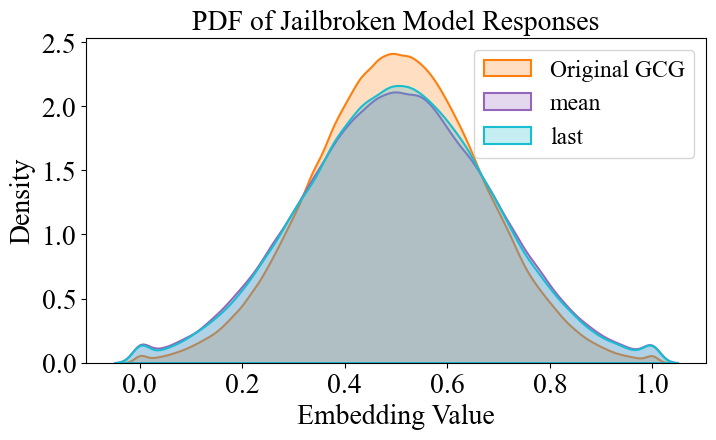

In [2]:
# 标准化数据

scaler = MinMaxScaler()
vector_1_normalized = scaler.fit_transform(vicuna_without_cosdecay_and_mean_sentemb15.detach().numpy()).flatten()
vector_2_normalized = scaler.fit_transform(vicuna_0_corpus.detach().numpy()).flatten()
vector_3_normalized = scaler.fit_transform(vicuna_without_cosdecay_and_lasthiddenstate45.detach().numpy()).flatten()
plt.figure(figsize=(8, 6))
# sns.kdeplot(vector_2_normalized, label='Original GCG', fill=True,color='#DD7C4F',linewidth=1.5)
# sns.kdeplot(vector_1_normalized, label='mean', fill=True,color='#629C35',linewidth=1.5)
# sns.kdeplot(vector_3_normalized, label='last', fill=True,color='#547BB4',linewidth=1.5)
# plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
# plt.legend()
# plt.savefig('vicunapdf.png')
# plt.show()

colors = ["#ff7f0e","#9467bd", "#17becf"]  # Purple, Orange, Cyan
sns.kdeplot(vector_2_normalized, label='Original GCG', fill=True,color=colors[0],linewidth=1.5)
sns.kdeplot(vector_1_normalized, label='mean', fill=True,color=colors[1],linewidth=1.5)
sns.kdeplot(vector_3_normalized, label='last', fill=True,color=colors[2],linewidth=1.5)
plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
plt.yticks([0,0.5,1.,1.5,2,2.5])
plt.legend()
plt.title('PDF of Jailbroken Model Responses', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  # 调整横纵坐标刻度数字大小
plt.xlabel("Embedding Value", fontsize=20)  # 横坐标：数据取值范围
plt.ylabel("Density", fontsize=20)  # 横坐标：数据取值范围
plt.savefig('vicunapdf.png',dpi=300)
plt.show()

/home/yjj/miniconda3/envs/jailbreak/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/yjj/models/bert-base-uncased/ were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identica

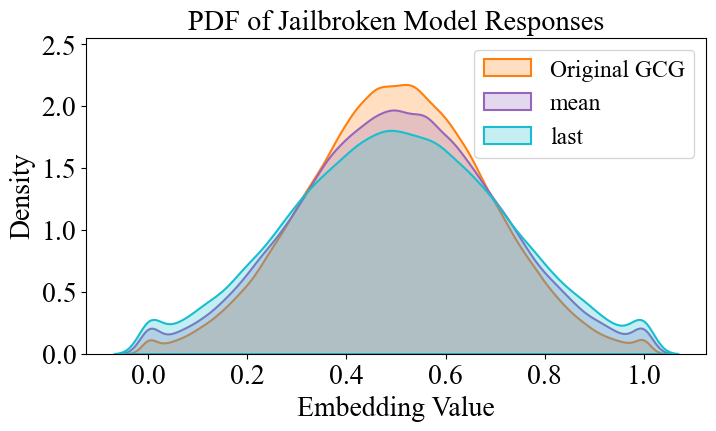

In [1]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.preprocessing import MinMaxScaler
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# 使用seaborn绘制KDE图
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 17  # 替换成你想要的字体大小
tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(3)
with open('llama2_without_cosdecay_and_mean_sentemb5.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:3')
    outputs = model(**encoded_input)
    embedding.append( outputs.last_hidden_state[0, 0, :].cpu())
llama2_without_cosdecay_and_mean_sentemb15=torch.stack(embedding,axis=0)


tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(2)
with open('llama2_0_corpus.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:2')
    outputs = model(**encoded_input)
    last_hidden_state = outputs.last_hidden_state[0, 0, :]
    embedding.append(last_hidden_state.cpu())
llama2_0_corpus=torch.stack(embedding,axis=0)

tokenizer = BertTokenizer.from_pretrained('/home/yjj/models/bert-base-uncased/')
model = BertModel.from_pretrained('/home/yjj/models/bert-base-uncased/').cuda(1)
with open('llama2_without_cosdecay_and_lasthiddenstate40.txt','r') as f:
    content=f.readlines()
content
embedding=[]
for line in content:
    encoded_input = tokenizer.encode_plus(line, return_tensors='pt',truncation=True,max_length=64).to('cuda:1')
    outputs = model(**encoded_input)
    last_hidden_state = outputs.last_hidden_state[0, 0, :]
    embedding.append(last_hidden_state.cpu())
llama2_without_cosdecay_and_lasthiddenstate45=torch.stack(embedding,axis=0)


# 标准化数据
scaler = MinMaxScaler()
llama2_1_normalized = scaler.fit_transform(llama2_without_cosdecay_and_mean_sentemb15.detach().numpy()).flatten()
llama2_2_normalized = scaler.fit_transform(llama2_0_corpus.detach().numpy()).flatten()
llama2_3_normalized = scaler.fit_transform(llama2_without_cosdecay_and_lasthiddenstate45.detach().numpy()).flatten()


plt.figure(figsize=(8, 6))
# sns.kdeplot(vector_2_normalized, label='Original GCG', fill=True,color='#DD7C4F',linewidth=1.5)
# sns.kdeplot(vector_1_normalized, label='mean', fill=True,color='#629C35',linewidth=1.5)
# sns.kdeplot(vector_3_normalized, label='last', fill=True,color='#547BB4',linewidth=1.5)
# plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
# plt.legend()
# plt.savefig('vicunapdf.png')
# plt.show()

colors = ["#ff7f0e","#9467bd", "#17becf"]  # Purple, Orange, Cyan
sns.kdeplot(llama2_2_normalized, label='Original GCG', fill=True,color=colors[0],linewidth=1.5)
sns.kdeplot(llama2_1_normalized, label='mean', fill=True,color=colors[1],linewidth=1.5)
sns.kdeplot(llama2_3_normalized, label='last', fill=True,color=colors[2],linewidth=1.5)
plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
plt.title('PDF of Jailbroken Model Responses')
plt.tick_params(axis='both', labelsize=20)  # 调整横纵坐标刻度数字大小
plt.xlabel("Embedding Value",fontsize=20)  # 横坐标：数据取值范围
plt.ylabel("Density",fontsize=20)  # 横坐标：数据取值范围
plt.ylim(0,2.55)
plt.yticks([0,0.5,1.,1.5,2,2.5])
plt.legend()
plt.savefig('llama2pdf.png',dpi=300)
plt.show()

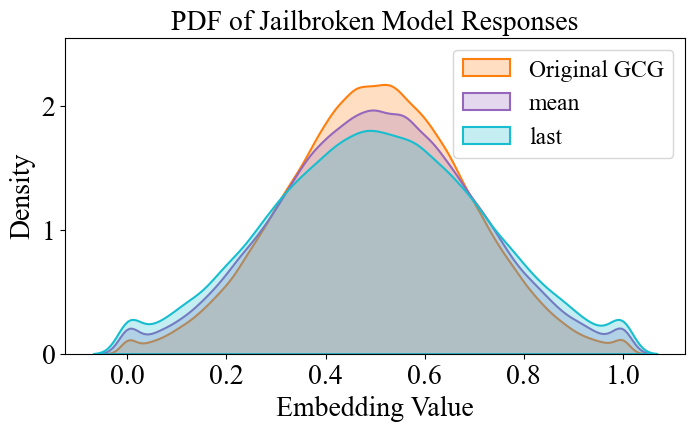

In [5]:
# 标准化数据
scaler = MinMaxScaler()
llama2_1_normalized = scaler.fit_transform(llama2_without_cosdecay_and_mean_sentemb15.detach().numpy()).flatten()
llama2_2_normalized = scaler.fit_transform(llama2_0_corpus.detach().numpy()).flatten()
llama2_3_normalized = scaler.fit_transform(llama2_without_cosdecay_and_lasthiddenstate45.detach().numpy()).flatten()


plt.figure(figsize=(8, 6))

colors = ["#ff7f0e","#9467bd", "#17becf"]  # Purple, Orange, Cyan
sns.kdeplot(llama2_2_normalized, label='Original GCG', fill=True,color=colors[0],linewidth=1.5)
sns.kdeplot(llama2_1_normalized, label='mean', fill=True,color=colors[1],linewidth=1.5)
sns.kdeplot(llama2_3_normalized, label='last', fill=True,color=colors[2],linewidth=1.5)

plt.title('PDF of Jailbroken Model Responses', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  # 调整横纵坐标刻度数字大小
plt.xlabel("Embedding Value", fontsize=20)  # 横坐标：数据取值范围
plt.ylabel("Density", fontsize=20)  # 横坐标：数据取值范围
plt.ylim(0,2.55)
plt.gca().set_aspect(0.25)  # 纵横比为0.5，纵坐标变扁
plt.legend()
plt.savefig('llama2pdf.png',dpi=300)
plt.show()

/home/yjj/miniconda3/envs/jailbreak/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


result.shape (200, 2)


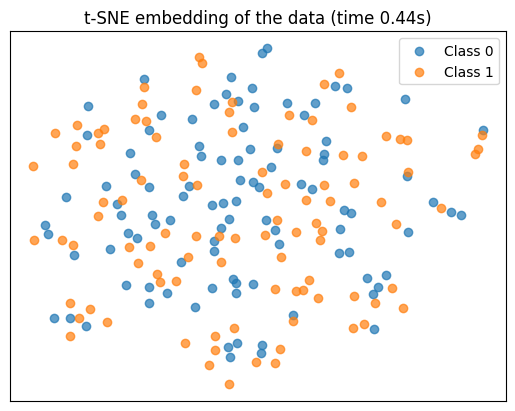

In [ ]:
# coding='utf-8'
"""t-SNE对手写数字进行可视化"""


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    # 创建一个散点图
    fig = plt.figure()
    ax = plt.subplot(111)
    
    # 按类别绘制不同的颜色
    unique_labels = np.unique(label)
    for lbl in unique_labels:
        idx = label == lbl  # 找到该类别对应的索引
        plt.scatter(data[idx, 0], data[idx, 1], label=f"Class {lbl}", alpha=0.7)  # 绘制散点

    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.legend()  # 显示类别图例
    return fig


def main():
    # 示例数据
    vicuna_0_corpus = torch.randn(100, 768)
    vicuna_without_cosdecay_and_mean_sentemb15 = torch.randn(100, 768)
    
    result = torch.cat((vicuna_0_corpus, vicuna_without_cosdecay_and_mean_sentemb15), axis=0).detach().numpy()
    label = torch.tensor([0] * len(vicuna_0_corpus) + [1] * len(vicuna_without_cosdecay_and_mean_sentemb15)).detach().numpy()
    
    # 使用t-SNE降维
    tsne = TSNE(n_components=2, init='pca', random_state=0,perplexity=5,learning_rate=200,n_iter=1000)
    t0 = time()
    result = tsne.fit_transform(result)
    print('result.shape', result.shape)
    
    # 绘制结果
    fig = plot_embedding(result, label, 't-SNE embedding of the data (time %.2fs)' % (time() - t0))
    plt.show(fig)
    # plt.scatter(result[:, 0], result[:, 1], c=label, cmap='jet')
    # plt.colorbar() 

main()
